In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io.wavfile import read, write
from collections import OrderedDict 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Audio(fname):
    """Provide a player widget for an audio file.
    
    Parameters
    ==========
    fname : string
      Filename to be played.
      
    Warning
    =======
    
    Browsers cache audio very aggressively. If you change an
    audio file on disk and are trying to listen to the  new version, you 
    may want to 
    """
    from IPython.display import HTML, display
    
    # Find out file extension and deduce MIME type for audio format
    ext = os.path.splitext(fname)[1].replace('.', '').lower()
    mimetype = 'audio/' + ('mpeg' if ext == 'mp3' else ext)
    
    tpl = """<p>{fname}:</p>
<audio controls>
    <source src="files/{fname}" type="{mimetype}">

Your browser does not support the Audio element; you can play 
<a href="files/{fname}">this file</a> manually.
</audio>
"""
    display(HTML(tpl.format(**locals())))

In [3]:
def specgram_cbar(x, title=None, clim=(0, 80) ):
    """Plot spectrogram with a colorbar and range normalization.
    
    Call matplotlib's specgram function, with a custom figure size, 
    automatic colobar, title and custom color limits to ease 
    comparison across multiple figures.
    
    Parameters
    ==========
    x : array
      One-dimensional array whose spectrogram should be plotted.
      
    title : string
      Optional title for the figure.
      
    clim : 2-tuple
      Range for the color limits plotted in the spectrogram.
    """
    f = plt.figure(figsize=(10,3))
    plt.specgram(x)
    plt.colorbar()
    plt.clim(*clim)
    if title is not None:
        plt.title(title)
    plt.show()

In [4]:
Audio("data/voice.wav")

In [5]:
def compress_signal(x, fraction):
    """Compress an input signal by dropping a fraction of its spectrum.
    
    Parameters
    ==========
    x : array
      1-d real array to be compressed
      
    fraction : float
      A number in the [0,1] range indicating which fraction of the spectrum
      of x should be zeroed out (1 means zero out the entire signal).
      
    Returns
    =======
    x_approx : array
      1-d real array reconstructed after having compressed the input.
    """
    # your code here

    newarray = np.copy(x)
    if fraction == 1:
        newarray = np.zeros(len(x))
    else:
        cut = int(len(x)*fraction) #How many elements to cut
        ordered = np.sort(np.absolute(x)) 
        minval = ordered[cut] #Minimum value an element needs to not be cut
        for i in range(len(x)):
            if abs(newarray[i]) < minval:
                newarray[i] = 0
    return(newarray)

In [6]:
x = np.random.rand(128)

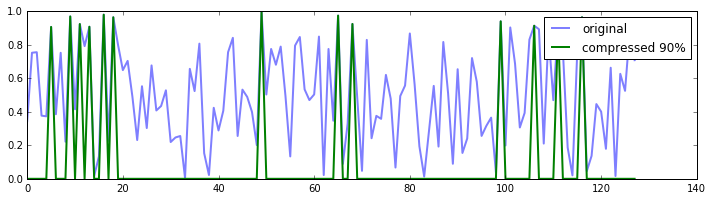

In [7]:
percent = .9  # play changing this in the 0-1 range

xa = compress_signal(x, percent)

plt.figure(figsize=(12,3))
plt.plot(x, alpha=0.5, lw=2, label='original')
plt.plot(xa, lw=2, label='compressed {0:.0%}'.format(percent))
plt.legend();

In [26]:
def compress_wav(fname, fraction):
    readin = read(fname)
    rate = readin[0]
    array = np.array(readin[1])
    typearray = array.astype(int16)
    compressed_array = (compress_signal(array, fraction))
    type_comp_array = compressed_array.astype(int16)

    chars = fname.split('.')
    newname = str(chars[0])+ "_comp_"+ str(fraction)
    morename = '%s.wav' % newname
    write(morename, rate, type_comp_array)
    return(rate, array, type_comp_array, morename)

In [76]:
a=compress_wav("voice.wav", 0.8)

In [77]:
Audio("data/voice_comp_0.8.wav")

In [40]:
from collections import OrderedDict

a = compress_wav("voice.wav", 0.0)
b = compress_wav("voice.wav", 0.1)
c = compress_wav("voice.wav", 0.5)
d = compress_wav("voice.wav", 0.75)
e = compress_wav("voice.wav", 0.9)
f = compress_wav("voice.wav", 0.95)
g = compress_wav("voice.wav", 0.99)

voices = OrderedDict([('0', (a[2], a[3])), ('0.1', (b[2], b[3])), \
                 ('0.5', (c[2], c[3])), ('0.75', (d[2], d[3])), \
                 ('0.9', (e[2], e[3])), ('0.95', (f[2], f[3])), \
                 ('0.99', (g[2], g[3])) ])

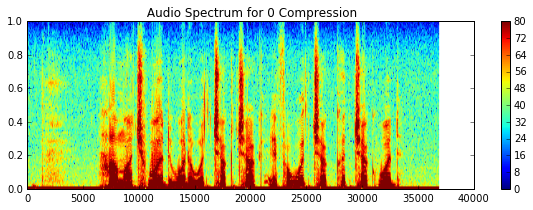

C:\Users\Mariam\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7042: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


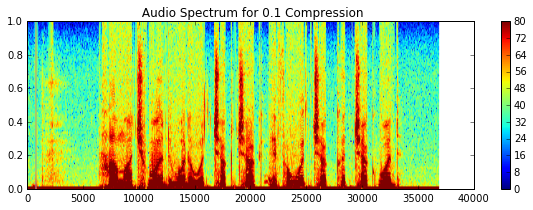

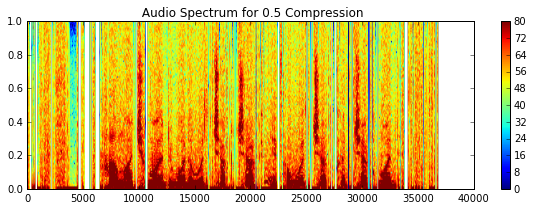

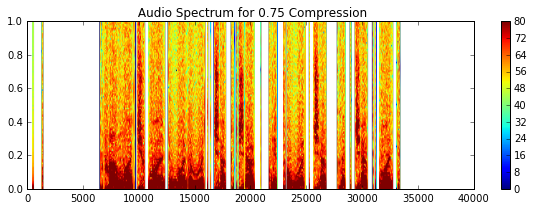

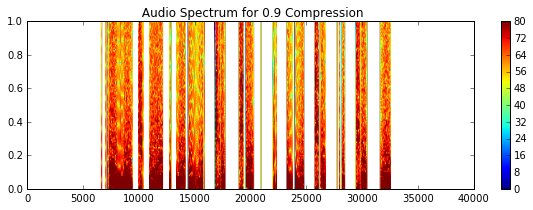

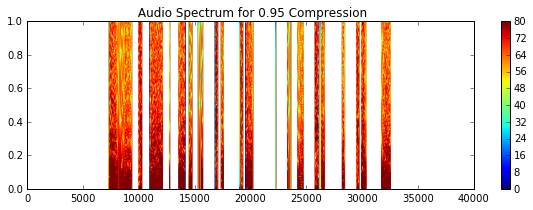

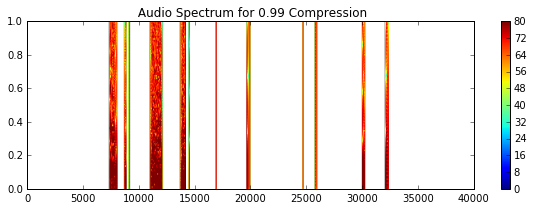

In [73]:
for key in voices:
    Audio(voices[key][1])
    specgram_cbar(voices[key][0], title=" Audio Spectrum for %s Compression" %key)

## I would not be able to tell what the audio is saying at around 0.95 compression.